## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  96.517969  1137.621153  0.763402  10.214085  1.494782
1  78.916874  1254.065783  0.161814   6.487824  1.116169
2  79.477964   946.526793  0.182838   6.904398  1.053982
3  27.350069   423.683731  0.012678   4.702680  0.206452
4  58.424476   198.848795  0.473422   3.623188  0.892999


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9994360	total: 66.1ms	remaining: 1m 6s
1:	learn: 0.9897927	total: 67.1ms	remaining: 33.5s
2:	learn: 0.9796691	total: 68ms	remaining: 22.6s
3:	learn: 0.9697666	total: 68.7ms	remaining: 17.1s
4:	learn: 0.9580906	total: 69.3ms	remaining: 13.8s
5:	learn: 0.9489535	total: 70ms	remaining: 11.6s
6:	learn: 0.9378551	total: 70.7ms	remaining: 10s
7:	learn: 0.9287768	total: 71.1ms	remaining: 8.82s
8:	learn: 0.9209583	total: 71.7ms	remaining: 7.89s
9:	learn: 0.9106945	total: 72.3ms	remaining: 7.16s
10:	learn: 0.9018869	total: 72.8ms	remaining: 6.54s
11:	learn: 0.8914837	total: 73.3ms	remaining: 6.03s
12:	learn: 0.8804440	total: 73.8ms	remaining: 5.61s
13:	learn: 0.8714550	total: 74.4ms	remaining: 5.24s
14:	learn: 0.8615178	total: 74.9ms	remaining: 4.92s
15:	learn: 0.8524275	total: 75.4ms	remaining: 4.64s
16:	learn: 0.8432047	total: 75.9ms	remaining: 4.39s
17:	learn: 0.8359215	total: 76.5ms	remaining: 4.17s
18:	learn: 0.8291565	total: 77ms	remaining: 3.97s


32:	learn: 0.7231251	total: 85.5ms	remaining: 2.51s
33:	learn: 0.7153512	total: 86.6ms	remaining: 2.46s
34:	learn: 0.7090209	total: 87.1ms	remaining: 2.4s
35:	learn: 0.7032016	total: 87.9ms	remaining: 2.35s
36:	learn: 0.6970355	total: 88.4ms	remaining: 2.3s
37:	learn: 0.6903891	total: 88.9ms	remaining: 2.25s
38:	learn: 0.6854329	total: 89.2ms	remaining: 2.2s
39:	learn: 0.6800552	total: 89.8ms	remaining: 2.16s
40:	learn: 0.6747684	total: 90.4ms	remaining: 2.11s
41:	learn: 0.6676099	total: 90.9ms	remaining: 2.07s
42:	learn: 0.6613819	total: 91.4ms	remaining: 2.03s
43:	learn: 0.6563449	total: 91.9ms	remaining: 2s
44:	learn: 0.6511259	total: 92.4ms	remaining: 1.96s
45:	learn: 0.6450048	total: 92.9ms	remaining: 1.93s
46:	learn: 0.6386640	total: 93.5ms	remaining: 1.9s
47:	learn: 0.6332574	total: 94ms	remaining: 1.86s
48:	learn: 0.6283126	total: 94.3ms	remaining: 1.83s
49:	learn: 0.6229657	total: 94.8ms	remaining: 1.8s
50:	learn: 0.6180621	total: 95.3ms	remaining: 1.77s
51:	learn: 0.6116216	t

209:	learn: 0.2247605	total: 163ms	remaining: 614ms
210:	learn: 0.2238542	total: 164ms	remaining: 612ms
211:	learn: 0.2227483	total: 164ms	remaining: 610ms
212:	learn: 0.2213797	total: 165ms	remaining: 609ms
213:	learn: 0.2201842	total: 165ms	remaining: 606ms
214:	learn: 0.2189290	total: 165ms	remaining: 604ms
215:	learn: 0.2177211	total: 166ms	remaining: 602ms
216:	learn: 0.2167927	total: 166ms	remaining: 600ms
217:	learn: 0.2155377	total: 167ms	remaining: 598ms
218:	learn: 0.2148338	total: 167ms	remaining: 595ms
219:	learn: 0.2137258	total: 167ms	remaining: 593ms
220:	learn: 0.2124040	total: 168ms	remaining: 591ms
221:	learn: 0.2115447	total: 168ms	remaining: 589ms
222:	learn: 0.2105182	total: 169ms	remaining: 587ms
223:	learn: 0.2093871	total: 169ms	remaining: 585ms
224:	learn: 0.2083486	total: 169ms	remaining: 583ms
225:	learn: 0.2073965	total: 170ms	remaining: 581ms
226:	learn: 0.2062550	total: 170ms	remaining: 579ms
227:	learn: 0.2052574	total: 170ms	remaining: 577ms
228:	learn: 

380:	learn: 0.1301826	total: 233ms	remaining: 378ms
381:	learn: 0.1296986	total: 233ms	remaining: 378ms
382:	learn: 0.1295700	total: 234ms	remaining: 377ms
383:	learn: 0.1287950	total: 234ms	remaining: 376ms
384:	learn: 0.1284228	total: 235ms	remaining: 375ms
385:	learn: 0.1276735	total: 235ms	remaining: 374ms
386:	learn: 0.1275505	total: 236ms	remaining: 373ms
387:	learn: 0.1274299	total: 236ms	remaining: 372ms
388:	learn: 0.1266380	total: 236ms	remaining: 371ms
389:	learn: 0.1261793	total: 237ms	remaining: 370ms
390:	learn: 0.1254695	total: 237ms	remaining: 369ms
391:	learn: 0.1253538	total: 237ms	remaining: 368ms
392:	learn: 0.1252402	total: 238ms	remaining: 367ms
393:	learn: 0.1251540	total: 238ms	remaining: 366ms
394:	learn: 0.1245266	total: 239ms	remaining: 366ms
395:	learn: 0.1240843	total: 239ms	remaining: 365ms
396:	learn: 0.1239752	total: 239ms	remaining: 364ms
397:	learn: 0.1233062	total: 240ms	remaining: 363ms
398:	learn: 0.1229355	total: 240ms	remaining: 362ms
399:	learn: 

578:	learn: 0.0829769	total: 320ms	remaining: 232ms
579:	learn: 0.0828762	total: 320ms	remaining: 232ms
580:	learn: 0.0827429	total: 320ms	remaining: 231ms
581:	learn: 0.0826520	total: 321ms	remaining: 230ms
582:	learn: 0.0822275	total: 321ms	remaining: 230ms
583:	learn: 0.0819805	total: 322ms	remaining: 229ms
584:	learn: 0.0818497	total: 322ms	remaining: 228ms
585:	learn: 0.0815576	total: 322ms	remaining: 228ms
586:	learn: 0.0811423	total: 323ms	remaining: 227ms
587:	learn: 0.0811134	total: 323ms	remaining: 226ms
588:	learn: 0.0808754	total: 324ms	remaining: 226ms
589:	learn: 0.0807467	total: 324ms	remaining: 225ms
590:	learn: 0.0805949	total: 324ms	remaining: 224ms
591:	learn: 0.0804454	total: 325ms	remaining: 224ms
592:	learn: 0.0803271	total: 325ms	remaining: 223ms
593:	learn: 0.0802991	total: 326ms	remaining: 223ms
594:	learn: 0.0801536	total: 326ms	remaining: 222ms
595:	learn: 0.0800271	total: 326ms	remaining: 221ms
596:	learn: 0.0798459	total: 327ms	remaining: 221ms
597:	learn: 

764:	learn: 0.0549016	total: 395ms	remaining: 121ms
765:	learn: 0.0548872	total: 396ms	remaining: 121ms
766:	learn: 0.0547937	total: 396ms	remaining: 120ms
767:	learn: 0.0545521	total: 397ms	remaining: 120ms
768:	learn: 0.0544605	total: 397ms	remaining: 119ms
769:	learn: 0.0543711	total: 398ms	remaining: 119ms
770:	learn: 0.0541244	total: 398ms	remaining: 118ms
771:	learn: 0.0540780	total: 398ms	remaining: 118ms
772:	learn: 0.0538426	total: 399ms	remaining: 117ms
773:	learn: 0.0538147	total: 399ms	remaining: 117ms
774:	learn: 0.0537993	total: 400ms	remaining: 116ms
775:	learn: 0.0537722	total: 400ms	remaining: 116ms
776:	learn: 0.0537572	total: 400ms	remaining: 115ms
777:	learn: 0.0534516	total: 401ms	remaining: 114ms
778:	learn: 0.0533588	total: 401ms	remaining: 114ms
779:	learn: 0.0531218	total: 402ms	remaining: 113ms
780:	learn: 0.0530314	total: 402ms	remaining: 113ms
781:	learn: 0.0528246	total: 403ms	remaining: 112ms
782:	learn: 0.0527358	total: 403ms	remaining: 112ms
783:	learn: 

974:	learn: 0.0332803	total: 482ms	remaining: 12.4ms
975:	learn: 0.0332431	total: 483ms	remaining: 11.9ms
976:	learn: 0.0331352	total: 484ms	remaining: 11.4ms
977:	learn: 0.0329711	total: 484ms	remaining: 10.9ms
978:	learn: 0.0328519	total: 484ms	remaining: 10.4ms
979:	learn: 0.0326922	total: 485ms	remaining: 9.89ms
980:	learn: 0.0325922	total: 485ms	remaining: 9.4ms
981:	learn: 0.0324578	total: 486ms	remaining: 8.9ms
982:	learn: 0.0323023	total: 486ms	remaining: 8.41ms
983:	learn: 0.0322111	total: 487ms	remaining: 7.91ms
984:	learn: 0.0321178	total: 487ms	remaining: 7.42ms
985:	learn: 0.0320043	total: 487ms	remaining: 6.92ms
986:	learn: 0.0318473	total: 488ms	remaining: 6.42ms
987:	learn: 0.0317583	total: 488ms	remaining: 5.93ms
988:	learn: 0.0316639	total: 489ms	remaining: 5.43ms
989:	learn: 0.0315541	total: 489ms	remaining: 4.94ms
990:	learn: 0.0314052	total: 489ms	remaining: 4.45ms
991:	learn: 0.0313130	total: 490ms	remaining: 3.95ms
992:	learn: 0.0312036	total: 490ms	remaining: 3.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3629239854600322


ABC Pre-generator MAE 0.8376949154713971


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

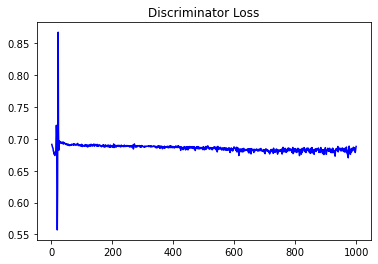

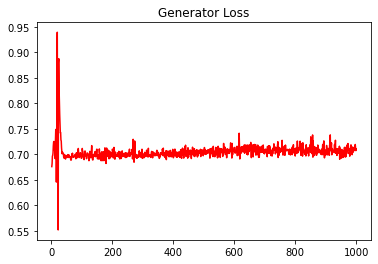

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.44517425255198034


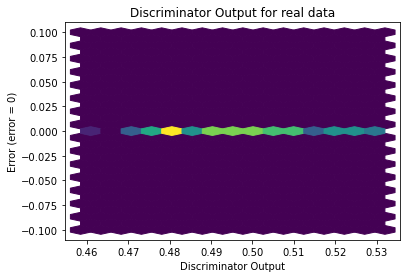

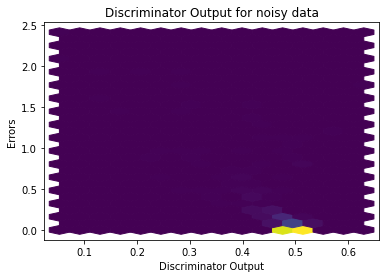

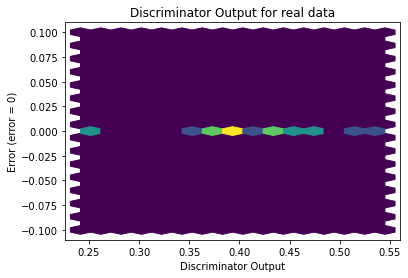

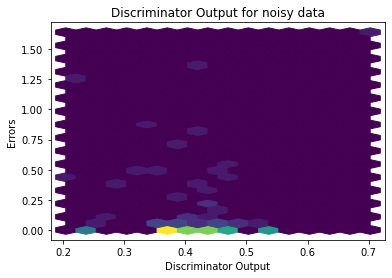

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

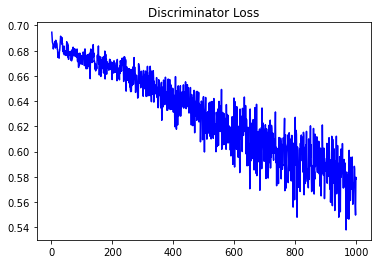

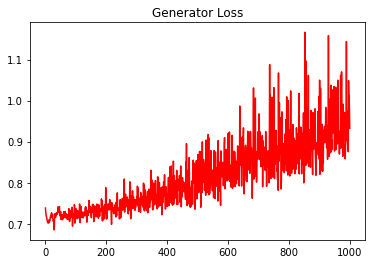

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.49731377425789836


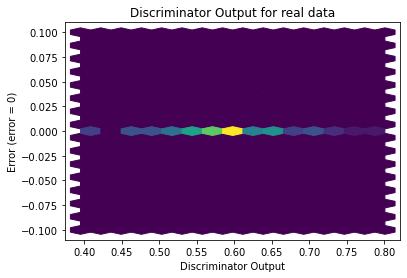

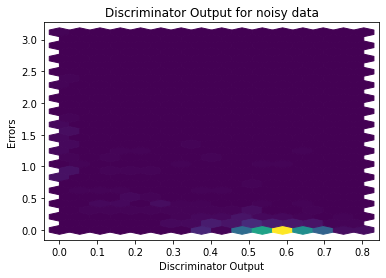

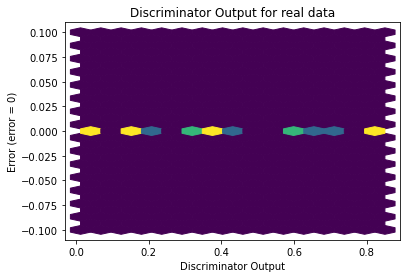

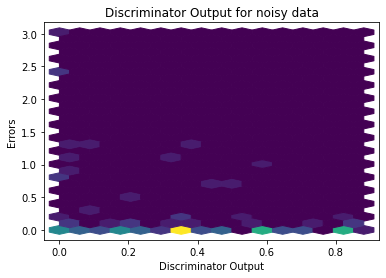

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


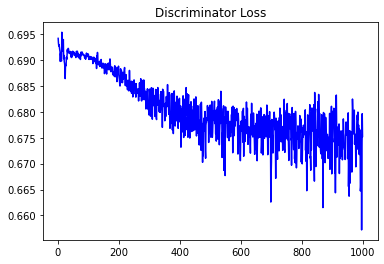

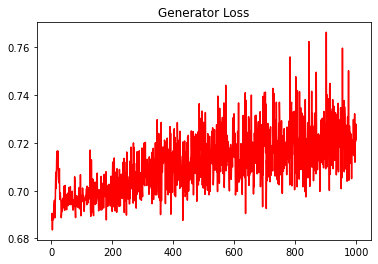

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4186911288315896


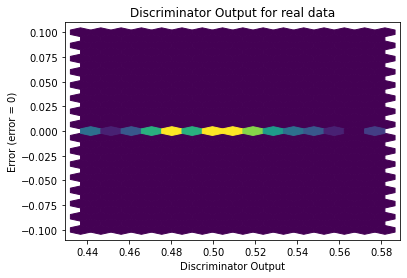

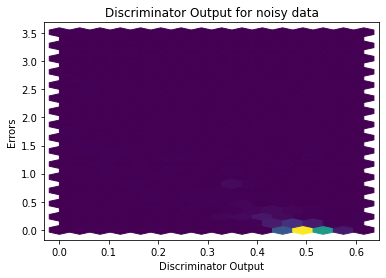

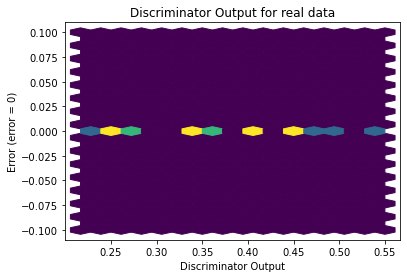

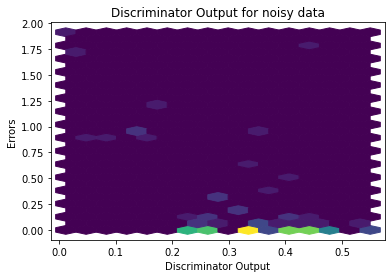

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


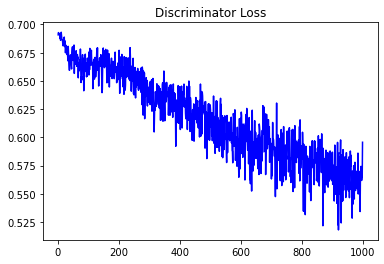

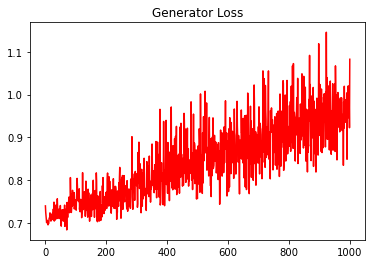

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5174660571985878


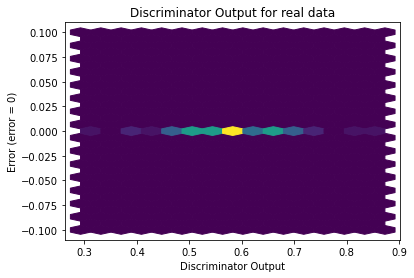

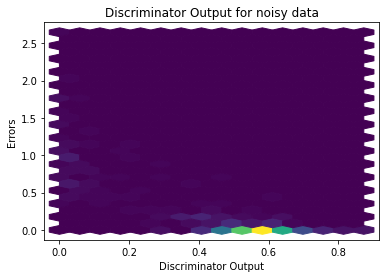

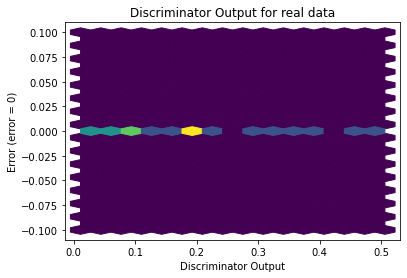

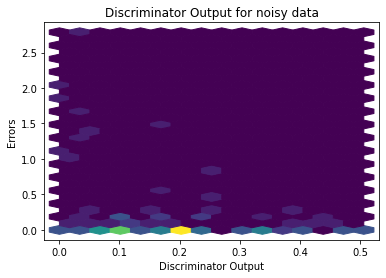

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5988]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7525]], requires_grad=True)
